# Models using PeptideAbundance as Feature

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, SimpleRNN
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_train_clin = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
df_train_pept = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
df_train_prot = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

### Clincal Training Data

In [ ]:
df_train_clin.head(10)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


In [ ]:
print(f'Unique Clinical Data patient #: {df_train_clin["patient_id"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Clinical Data:')
for col in df_train_clin.columns:
    print(f'Null values found in {col}: {df_train_clin[col].isna().sum()}')
print('')

Unique Clinical Data patient #: 248
----------------------------------------------------------
Null Values Found in Clinical Data:
Null values found in visit_id: 0
Null values found in patient_id: 0
Null values found in visit_month: 0
Null values found in updrs_1: 1
Null values found in updrs_2: 2
Null values found in updrs_3: 25
Null values found in updrs_4: 1038
Null values found in upd23b_clinical_state_on_medication: 1327



### Peptide training data

In [ ]:
df_train_pept.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5
6,55_0,0,55,O00533,VIAVNEVGR,170878.0
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.0
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.1
9,55_0,0,55,O00584,ELDLNSVLLK,27229.3


In [ ]:
print(f'Unique Peptide Data patient #: {df_train_pept["patient_id"].nunique()}')
print(f'Unique Peptides #: {df_train_pept["Peptide"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Peptide Data:')
for col in df_train_pept.columns:
    print(f'Null values found in {col}: {df_train_pept[col].isna().sum()}')
print('')

Unique Peptide Data patient #: 248
Unique Peptides #: 968
----------------------------------------------------------
Null Values Found in Peptide Data:
Null values found in visit_id: 0
Null values found in visit_month: 0
Null values found in patient_id: 0
Null values found in UniProt: 0
Null values found in Peptide: 0
Null values found in PeptideAbundance: 0



### Protein Training Data

In [ ]:
df_train_prot.head(10)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.30
1,55_0,0,55,O00533,732430.00
2,55_0,0,55,O00584,39585.80
3,55_0,0,55,O14498,41526.90
4,55_0,0,55,O14773,31238.00
5,55_0,0,55,O14791,4202.71
6,55_0,0,55,O15240,177775.00
7,55_0,0,55,O15394,62898.20
8,55_0,0,55,O43505,333376.00
9,55_0,0,55,O60888,166850.00


In [ ]:
print(f'Unique Protein Data patient #: {df_train_prot["patient_id"].nunique()}')
print(f'Unique Proteins #: {df_train_prot["UniProt"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Protein Data:')
for col in df_train_prot.columns:
    print(f'Null values found in {col}: {df_train_prot[col].isna().sum()}')
print('')

Unique Protein Data patient #: 248
Unique Proteins #: 227
----------------------------------------------------------
Null Values Found in Protein Data:
Null values found in visit_id: 0
Null values found in visit_month: 0
Null values found in patient_id: 0
Null values found in UniProt: 0
Null values found in NPX: 0



## Data Prep for the final submission

In [ ]:
targets = {}
for event in range(1, 5):
    for month in [0, 6, 12, 24]:
        df_train_clin[f'updrs_{event}_plus_{month}_months'] = 0

for p_id in df_train_clin.patient_id.unique():
    patient_data = df_train_clin[df_train_clin.patient_id == p_id]
    month_ranges = []
    month_intervals = [0, 6, 12, 24]
    for visit_month in patient_data.visit_month.values:
        month_ranges.append([visit_month, visit_month + 6, visit_month + 12, visit_month + 24])
    for idx, month_range in enumerate(month_ranges):
        for event in range(1, 5):
            updrs_values = patient_data[patient_data.visit_month.isin(month_range)][f'updrs_{event}'].fillna(0).to_list()
            if len(updrs_values) == 4:
                for e, value in enumerate(updrs_values):
                    m = month_range[0]
                    patient_data.loc[patient_data.visit_month == m, [f'updrs_{event}_plus_{month_intervals[e]}_months']] = value
            else:
                patient_data = patient_data[~patient_data.visit_month.isin(month_range)]
    targets[p_id] = patient_data


In [ ]:
formatted_clin = pd.concat(targets.values(), ignore_index=True).set_index('visit_id').iloc[:, 7:]
formatted_clin.head()

,updrs_1_plus_0_months,updrs_1_plus_6_months,updrs_1_plus_12_months,updrs_1_plus_24_months,updrs_2_plus_0_months,updrs_2_plus_6_months,updrs_2_plus_12_months,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months
visit_id,,,,,,,,,,,,,,,,
55_0,10,8,10,16,6,10,10,9,15,34,41,49,0,0,0,0
55_6,8,10,7,14,10,10,13,13,34,41,38,49,0,0,0,0
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0


## Selecting Peptide as features with PeptideAbundance values

In [ ]:
peptide_features = df_train_pept.pivot(index='visit_id', columns = ['Peptide'], values = 'PeptideAbundance')
peptide_features.head()

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.0,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.2,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.2,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09


In [ ]:
df = peptide_features.merge(formatted_clin, left_index=True,right_index=True,how='right')
print(f'\nNA values: {df[peptide_features.columns].isna().sum().sum()/(len(df)*len(peptide_features.columns)):.2%}')
df['visit_month'] = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).values
df.head()


NA values: 54.03%


,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,8984260.0,53855.6,8579740.0,NaN,19735.4,114400.0,46371.1,70412.0,7404060.0,39389.3,...,9,15,34,41,49,0,0,0,0,0
55_6,8279770.0,45251.9,8655890.0,49927.5,23820.4,90539.4,38652.4,63052.4,7344740.0,40871.1,...,13,34,41,38,49,0,0,0,0,6
55_12,8382390.0,53000.9,8995640.0,45519.2,17813.5,147312.0,45840.9,72325.0,6635000.0,35002.7,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24


In [ ]:
def extract_month(visit_id):
    split_visit_id = visit_id.split('_')
    return int(split_visit_id[1])

unique_visit_months = df.reset_index().visit_id.apply(extract_month).unique().tolist()
protein_list = peptide_features.columns.tolist()


In [ ]:
X = df[peptide_features.columns.to_list() + ["visit_month"]]
y = df[formatted_clin.columns]
print('\nX and y shapes:')
X.shape, y.shape


X and y shapes:


((954, 969), (954, 16))

In [ ]:

X.loc[:, 'visit_month'] = X['visit_month'].astype(float)
y = y.astype(float)

#Define a Column Transformer to scale and impute numerical features
preprocessor = make_column_transformer(
    (make_pipeline(KNNImputer(), StandardScaler()), 
     make_column_selector(dtype_include='number'))
)

#Apply the preprocessor to X for transformed data
X_transformed = preprocessor.fit_transform(X)


# sMAPE Function

In [ ]:

def smape_loss_plus_one(y_true, y_pred):
    epsilon = 0.1
    numer = K.abs(y_pred + 1 - y_true - 1)
    denom = K.maximum(K.abs(y_true) + K.abs(y_pred) + 2*epsilon, 1.5 + 2*epsilon)
    smape_plus_one = numer / (denom/2)
    smape_plus_one = tf.where(tf.math.is_nan(smape_plus_one), tf.zeros_like(smape_plus_one), smape_plus_one)
    return smape_plus_one

def calculate_smape_plus_one(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numer = np.round(np.abs(y_pred + 1 - y_true - 1), 0)
    denom = np.round(np.abs(y_true) + np.abs(y_pred) + 2, 0)
    smape_plus_one = 1/len(y_true) * np.sum(np.nan_to_num(numer / (denom/2))) * 100
    return smape_plus_one


# Submission Preperation

In [ ]:
test_proteins = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv') 
test_peptides = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv') 
sample_submission = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv')
clinical = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [ ]:
def prepare_features(clinical, proteins):
    """Format features"""
    X_submission = proteins.pivot(index='visit_id',columns='UniProt', values='NPX')
    
    
    missing_visits = np.setdiff1d(np.array(clinical.visit_id.unique()), np.array(X_submission.index)).tolist()
    missing_proteins = np.setdiff1d(np.array(protein_list), np.array(X_submission.columns)).tolist()
    for mv in missing_visits:
        X_submission.loc[mv] = np.NaN
    
    for mp in missing_proteins:
        X_submission.loc[:,mp] = np.NaN
        
    X_submission = X_submission[protein_list]    
    X_submission['visit_month'] = X_submission.reset_index().visit_id.str.split("_").apply(lambda x: int(x[1])).values    
    X_submission.visit_month = X_submission.visit_month.astype('float')
    
    return X_submission
def get_predictions(features, model):
    """Make predictions from prepared features"""
    X_submission_trans = preprocessor.transform(features)
    # Predict and format ratings
    pred_submission = np.around(np.abs(model.predict(X_submission_trans)),0)
    pred_submission = pd.DataFrame(pred_submission, index= features.index, columns = y.columns)
    
    return pred_submission
def format_predictions(predictions, sample_submission):
    """Format predictions for submission"""
    pred_submission = pd.DataFrame(predictions.stack())

    # Map predictions to sample_submission
    pred_submission.index = pred_submission.index.map('_'.join)
    pred_submission.columns = ['rating']
    sample_submission.rating = sample_submission.prediction_id.map(pred_submission.rating)
    
    return sample_submission.fillna(0)

# Sequential Model with GRU

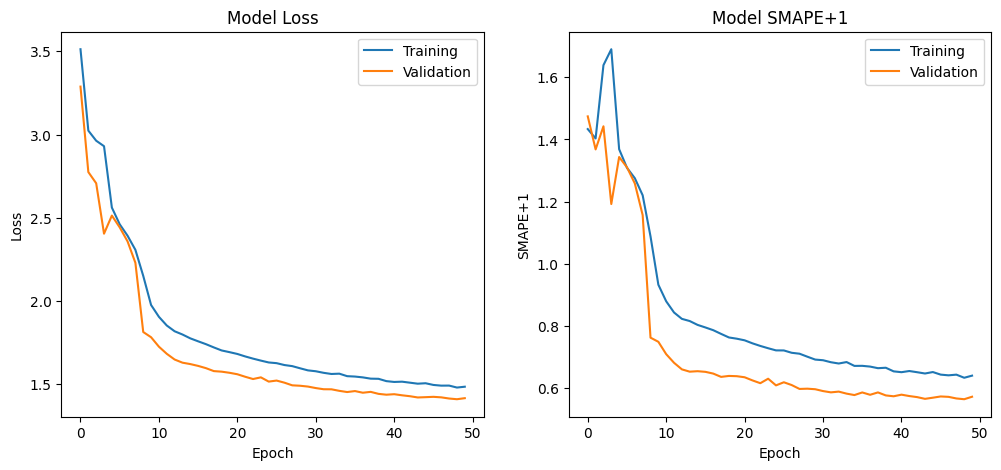

Final training loss: 1.4853540658950806
Final validation loss: 1.416481375694275


In [ ]:
model = Sequential()
model.add(GRU(128, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.15))
model.add(GRU(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.15))
model.add(GRU(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.15))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

# Reshape input data to be suitable for GRU layers
X_transformed = X_transformed.reshape(X_transformed.shape[0], X_transformed.shape[1], 1)

history = model.fit(X_transformed, y, epochs=50, batch_size=64, validation_split=.2, verbose=False)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])

In [ ]:
# Prepare test features
test_features = prepare_features(clinical, test_proteins)

# Make predictions for test features
test_predictions = get_predictions(test_features, model)

# Format predictions for submission
test_submission = format_predictions(test_predictions, sample_submission)

# Print the first few rows of the submission
print(test_submission.head())



1/1 [==============================] - 0s 217ms/step
                   prediction_id  rating  group_key
0   3342_0_updrs_1_plus_0_months     7.0          0
1   3342_0_updrs_1_plus_6_months     6.0          0
2  3342_0_updrs_1_plus_12_months     7.0          0
3  3342_0_updrs_1_plus_24_months     7.0          0
4   3342_0_updrs_2_plus_0_months     7.0          0


In [ ]:
test_features = prepare_features(clinical, test_proteins)
test_predictions = get_predictions(test_features,model)
test_submission = format_predictions(test_predictions, sample_submission)
test_submission

1/1 [==============================] - 0s 268ms/step


,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,7.0,0
1,3342_0_updrs_1_plus_6_months,6.0,0
2,3342_0_updrs_1_plus_12_months,7.0,0
3,3342_0_updrs_1_plus_24_months,7.0,0
4,3342_0_updrs_2_plus_0_months,7.0,0
...,...,...,...
59,50423_6_updrs_3_plus_24_months,23.0,6
60,50423_6_updrs_4_plus_0_months,0.0,6
61,50423_6_updrs_4_plus_6_months,0.0,6
62,50423_6_updrs_4_plus_12_months,0.0,6


### Submission for Sequential Model with GRU

In [ ]:
import sys
sys.path.append('/kaggle/input/amp-parkinsons-disease-progression-prediction')

import amp_pd_peptide_310
env = amp_pd_peptide_310.make_env()   # environment provided by competition
iter_test = env.iter_test()

In [ ]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    sub_features = prepare_features(test, test_proteins)
    sub_predictions = get_predictions(sub_features,model)
    submission = format_predictions(sub_predictions, sample_submission)

    env.predict(submission)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
1/1 [==============================] - 0s 204ms/step


In [ ]:
pd.read_csv('/kaggle/working/submission.csv')

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.0
1,3342_0_updrs_1_plus_6_months,6.0
2,3342_0_updrs_1_plus_12_months,7.0
3,3342_0_updrs_1_plus_24_months,7.0
4,3342_0_updrs_2_plus_0_months,7.0
...,...,...
59,50423_6_updrs_3_plus_24_months,23.0
60,50423_6_updrs_4_plus_0_months,0.0
61,50423_6_updrs_4_plus_6_months,0.0
62,50423_6_updrs_4_plus_12_months,0.0


# Sequential DL Model with fully connected layers

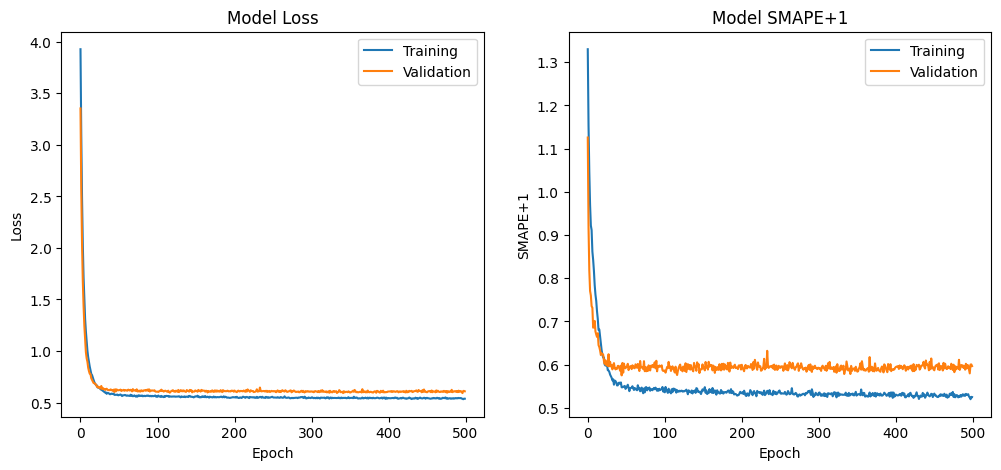

Final training loss: 0.5371091961860657
Final validation loss: 0.609063982963562


In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[X.shape[1]], activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

history = model.fit(X_transformed, y, epochs=500, batch_size=32, validation_split=.2, verbose=False)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])

In [ ]:
# Prepare test features
test_features = prepare_features(clinical, test_proteins)

# Make predictions for test features
test_predictions = get_predictions(test_features, model)

# Format predictions for submission
test_submission = format_predictions(test_predictions, sample_submission)

# Print the first few rows of the submission
print(test_submission.head())



1/1 [==============================] - 0s 79ms/step
                   prediction_id  rating
0   3342_6_updrs_1_plus_0_months     5.0
1   3342_6_updrs_1_plus_6_months     6.0
2  3342_6_updrs_1_plus_12_months     6.0
3  3342_6_updrs_1_plus_24_months     6.0
4   3342_6_updrs_2_plus_0_months     4.0


In [ ]:
test_features = prepare_features(clinical, test_proteins)
test_predictions = get_predictions(test_features,model)
test_submission = format_predictions(test_predictions, sample_submission)
test_submission

1/1 [==============================] - 0s 23ms/step


,prediction_id,rating
0,3342_6_updrs_1_plus_0_months,5.0
1,3342_6_updrs_1_plus_6_months,6.0
2,3342_6_updrs_1_plus_12_months,6.0
3,3342_6_updrs_1_plus_24_months,6.0
4,3342_6_updrs_2_plus_0_months,4.0
5,3342_6_updrs_2_plus_6_months,5.0
6,3342_6_updrs_2_plus_12_months,5.0
7,3342_6_updrs_2_plus_24_months,5.0
8,3342_6_updrs_3_plus_0_months,14.0
9,3342_6_updrs_3_plus_6_months,15.0


### Submission for Sequential Model with fully connected layers

In [ ]:
import sys
sys.path.append('/kaggle/input/amp-parkinsons-disease-progression-prediction')

import amp_pd_peptide_310
env = amp_pd_peptide_310.make_env()   # environment provided by competition
iter_test = env.iter_test()

In [ ]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    sub_features = prepare_features(test, test_proteins)
    sub_predictions = get_predictions(sub_features,model)
    submission = format_predictions(sub_predictions, sample_submission)

    env.predict(submission)

In [ ]:
pd.read_csv('/kaggle/working/submission.csv')

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.0
1,3342_0_updrs_1_plus_6_months,6.0
2,3342_0_updrs_1_plus_12_months,7.0
3,3342_0_updrs_1_plus_24_months,7.0
4,3342_0_updrs_2_plus_0_months,7.0
...,...,...
59,50423_6_updrs_3_plus_24_months,23.0
60,50423_6_updrs_4_plus_0_months,0.0
61,50423_6_updrs_4_plus_6_months,0.0
62,50423_6_updrs_4_plus_12_months,0.0


# Sequential DL Model with RNN

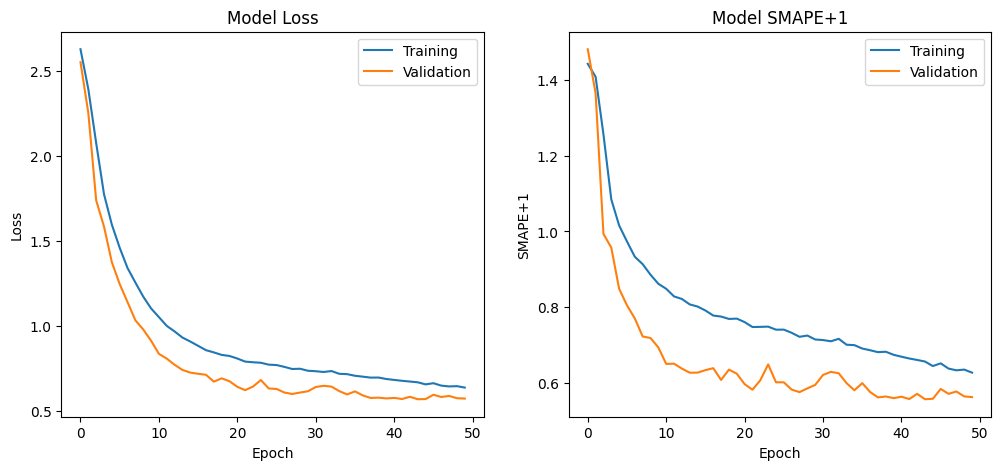

Final training loss: 0.6354522109031677
Final validation loss: 0.5708218812942505


In [ ]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.15))
model.add(SimpleRNN(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.15))
model.add(SimpleRNN(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.15))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

# Reshape input data to be suitable for GRU layers
X_transformed = X_transformed.reshape(X_transformed.shape[0], X_transformed.shape[1], 1)

history = model.fit(X_transformed, y, epochs=50, batch_size=64, validation_split=.2, verbose=False)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])

In [ ]:
# Prepare test features
test_features = prepare_features(clinical, test_proteins)

# Make predictions for test features
test_predictions = get_predictions(test_features, model)

# Format predictions for submission
test_submission = format_predictions(test_predictions, sample_submission)

# Print the first few rows of the submission
print(test_submission.head())



1/1 [==============================] - 1s 529ms/step
                   prediction_id  rating
0   3342_6_updrs_1_plus_0_months     7.0
1   3342_6_updrs_1_plus_6_months     7.0
2  3342_6_updrs_1_plus_12_months     7.0
3  3342_6_updrs_1_plus_24_months     7.0
4   3342_6_updrs_2_plus_0_months     7.0


In [ ]:
test_features = prepare_features(clinical, test_proteins)
test_predictions = get_predictions(test_features,model)
test_submission = format_predictions(test_predictions, sample_submission)
test_submission

1/1 [==============================] - 0s 170ms/step


,prediction_id,rating
0,3342_6_updrs_1_plus_0_months,7.0
1,3342_6_updrs_1_plus_6_months,7.0
2,3342_6_updrs_1_plus_12_months,7.0
3,3342_6_updrs_1_plus_24_months,7.0
4,3342_6_updrs_2_plus_0_months,7.0
5,3342_6_updrs_2_plus_6_months,7.0
6,3342_6_updrs_2_plus_12_months,7.0
7,3342_6_updrs_2_plus_24_months,7.0
8,3342_6_updrs_3_plus_0_months,18.0
9,3342_6_updrs_3_plus_6_months,21.0


### Submission for Sequential Model with RNN

In [ ]:
import sys
sys.path.append('/kaggle/input/amp-parkinsons-disease-progression-prediction')

import amp_pd_peptide_310
env = amp_pd_peptide.make_env()   # environment provided by competition
iter_test = env.iter_test()

In [ ]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    sub_features = prepare_features(test, test_proteins)
    sub_predictions = get_predictions(sub_features,model)
    submission = format_predictions(sub_predictions, sample_submission)

    env.predict(submission)

In [ ]:
pd.read_csv('/kaggle/working/submission.csv')

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.0
1,3342_0_updrs_1_plus_6_months,6.0
2,3342_0_updrs_1_plus_12_months,7.0
3,3342_0_updrs_1_plus_24_months,7.0
4,3342_0_updrs_2_plus_0_months,7.0
...,...,...
59,50423_6_updrs_3_plus_24_months,23.0
60,50423_6_updrs_4_plus_0_months,0.0
61,50423_6_updrs_4_plus_6_months,0.0
62,50423_6_updrs_4_plus_12_months,0.0


In [ ]:
#### The Notebooks were sent for submission to Kaggle separately where kaggle scored the notebook on hidden test data. The detailed scoring information is provided in the report.

References: https://www.kaggle.com/code/umbertofasci/amp-pdpp-eda-tf-model/notebook#sMAPE-Function